In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

import gpflow
import gpflux

tf.keras.backend.set_floatx("float64")

(94, 1) (94, 1)


Text(0, 0.5, 'Acceleration')

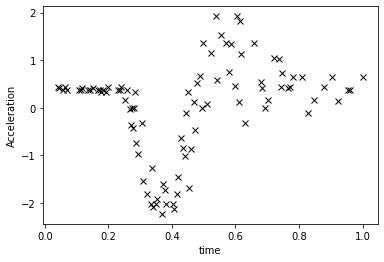

In [18]:
def motorcycle_data():
    """Return inputs and outputs for the motorcycle dataset. We normalise the outputs."""
    df = pd.read_csv("../data/motor.csv", index_col=0)
    X, Y = df["times"].values.reshape(-1, 1), df["accel"].values.reshape(-1, 1)
    Y = (Y - Y.mean()) / Y.std()
    X /= X.max()
    return X, Y


X, Y = motorcycle_data()
print(X.shape, Y.shape)
plt.plot(X, Y, "kx")
plt.xlabel("time")
plt.ylabel("Acceleration")

In [19]:
num_data = len(X)
num_inducing = 10
output_dim = Y.shape[1]

Z = np.linspace(X.min(), X.max(), num_inducing).reshape(-1, 1)
print(Z.shape)

kernel1 = gpflow.kernels.SquaredExponential()
inducing_variable1 = gpflow.inducing_variables.InducingPoints(Z.copy())

gp_layer1 = gpflux.layers.GPLayer(
    kernel1, inducing_variable1, num_data=num_data, num_latent_gps=output_dim
)

(10, 1)


/home/cn321/.local/lib/python3.8/site-packages/gpflux/layers/gp_layer.py:175: UserWarning: Beware, no mean function was specified in the construction of the `GPLayer` so the default `gpflow.mean_functions.Identity` is being used. This mean function will only work if the input dimensionality matches the number of latent Gaussian processes in the layer.
  warnings.warn(
/home/cn321/.local/lib/python3.8/site-packages/gpflux/layers/gp_layer.py:198: UserWarning: Could not verify the compatibility of the `kernel`, `inducing_variable` and `mean_function`. We advise using `gpflux.helpers.construct_*` to create compatible kernels and inducing variables. As `num_latent_gps=1` has been specified explicitly, this will be used to create the `q_mu` and `q_sqrt` parameters.
  warnings.warn(


In [20]:
kernel2 = gpflow.kernels.SquaredExponential()
inducing_variable2 = gpflow.inducing_variables.InducingPoints(Z.copy())
gp_layer2 = gpflux.layers.GPLayer(
    kernel2,
    inducing_variable2,
    num_data=num_data,
    num_latent_gps=output_dim,
    mean_function=gpflow.mean_functions.Zero(),
)

In [21]:
likelihood_layer = gpflux.layers.LikelihoodLayer(gpflow.likelihoods.Gaussian(0.1))
two_layer_dgp = gpflux.models.DeepGP([gp_layer1, gp_layer2], likelihood_layer)
model = two_layer_dgp.as_training_model()
model.compile(tf.optimizers.Adam(0.01))

/tmp/ipykernel_4050389/1606456890.py:1: DeprecationWarning: Call to deprecated class TrackableLayer. (GPflux's `TrackableLayer` was prior to TF2.5 used to collect GPflow variables in subclassed layers. As of TF 2.5, `tf.Module` supports this natively and there is no need for `TrackableLayer` anymore. It will be removed in GPflux version `1.0.0`.)
  likelihood_layer = gpflux.layers.LikelihoodLayer(gpflow.likelihoods.Gaussian(0.1))


In [22]:
history = model.fit({"inputs": X, "targets": Y}, epochs=int(1e3), verbose=0)

2022-07-12 18:09:54.707202: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x455fe540


/tmp/ipykernel_4050389/509188499.py:13: DeprecationWarning: Call to deprecated class TrackableLayer. (GPflux's `TrackableLayer` was prior to TF2.5 used to collect GPflow variables in subclassed layers. As of TF 2.5, `tf.Module` supports this natively and there is no need for `TrackableLayer` anymore. It will be removed in GPflux version `1.0.0`.)
  likelihood_layer = gpflux.layers.LikelihoodLayer(gpflow.likelihoods.Gaussian(0.1))


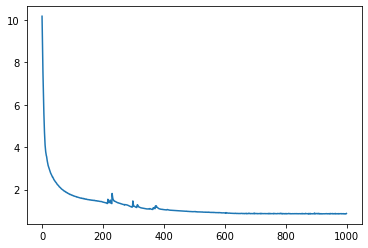

In [23]:
num_data = len(X)
num_inducing = 10
output_dim = Y.shape[1]

kernel = gpflow.kernels.SquaredExponential()
inducing_variable = gpflow.inducing_variables.InducingPoints(
    np.linspace(X.min(), X.max(), num_inducing).reshape(-1, 1)
)
gp_layer = gpflux.layers.GPLayer(
    kernel, inducing_variable, num_data=num_data, num_latent_gps=output_dim
)

likelihood_layer = gpflux.layers.LikelihoodLayer(gpflow.likelihoods.Gaussian(0.1))
single_layer_dgp = gpflux.models.DeepGP([gp_layer], likelihood_layer)
model = single_layer_dgp.as_training_model()
model.compile(tf.optimizers.Adam(0.01))

history = model.fit({"inputs": X, "targets": Y}, epochs=int(1e3), verbose=0)
plt.plot(history.history["loss"])